## Exercise 1

A well established and diffused method for detecting a disease in blood fails to detect the presence
of disease in 15% of the patients that actually have the disease. A young UniPD startUp has
developed an innovative technique of screening. During the qualification phase, a random sample
of n = 75 patients known to have the disease is screened using the new method. 

a) Write the probability mass function of getting a false negative y , using the old technique.

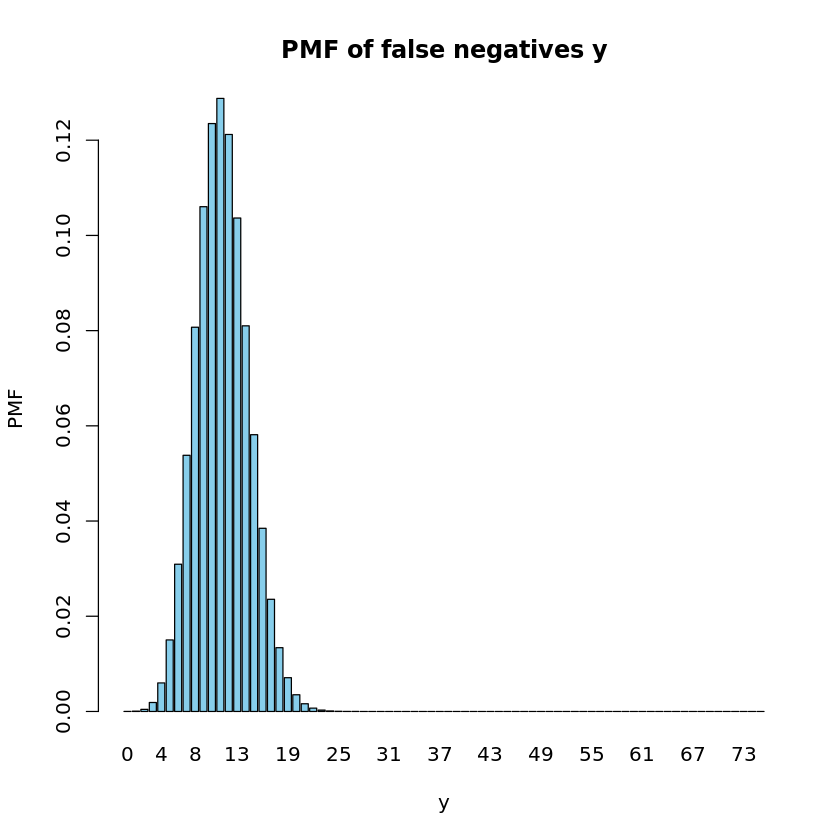

In [12]:
p_false_negative <- 0.15

y <- seq(0,75,by=1)
pmf <- dbinom (y,75,p_false_negative)

barplot(pmf,names.arg=y,
        main = "PMF of false negatives y",
        xlab = "y",
        ylab = "PMF",col='skyblue') 

b) Let n = 75 be the patient sample, the new method fails to detect the disease in y = 6 cases. What is
the frequentist estimator for the failure probability of the new method ?

In the frequentist approach, assuming a Binomial model. the best estimate for the failure porbbaility is: 
$$p = \frac{y}{n}= \frac{6}{75}= 0.08$$ with: $$\sigma_{p} = \sqrt\frac{p(1-p)}{n} \approx 0.03$$

c) In Bayesian setting, evaluate the posterior probability, assuming a beta distribution with mean
value 0.15 and standard deviation 0.14. Plot the posterior distribution for y, and mark on the plot
the mean value and variance.

First we need to find $\alpha$ and $\beta$ parameters for the Beta prior given $\mu$ and $\sigma$. It can be found:
 $$ \alpha = \mu(\frac{\mu(1-\mu)}{\sigma^2} -1)  \approx 0.826 $$
 $$ \beta =(1-\mu)(\frac{\mu(1-\mu)}{\sigma^2} -1)  \approx 4.679 $$

In [3]:
alfa =0.15*(0.15*0.85/0.14**2 -1 )
beta = 0.85*(0.15*0.85/0.14**2 -1 )
cat(alfa, beta)
p <- seq(0,1,by=0.0001)
prior <- dbeta(p,alfa,beta)

0.8257653 4.679337

The posterior distribution for the failure probability is a Beta distribution Beta($\alpha',\beta'$ ), with $\alpha'= \alpha + y \approx 6.826$ and $\beta'= \beta + n-y \approx 73.679 $.

p = 0.08478674 +- 0.03085551

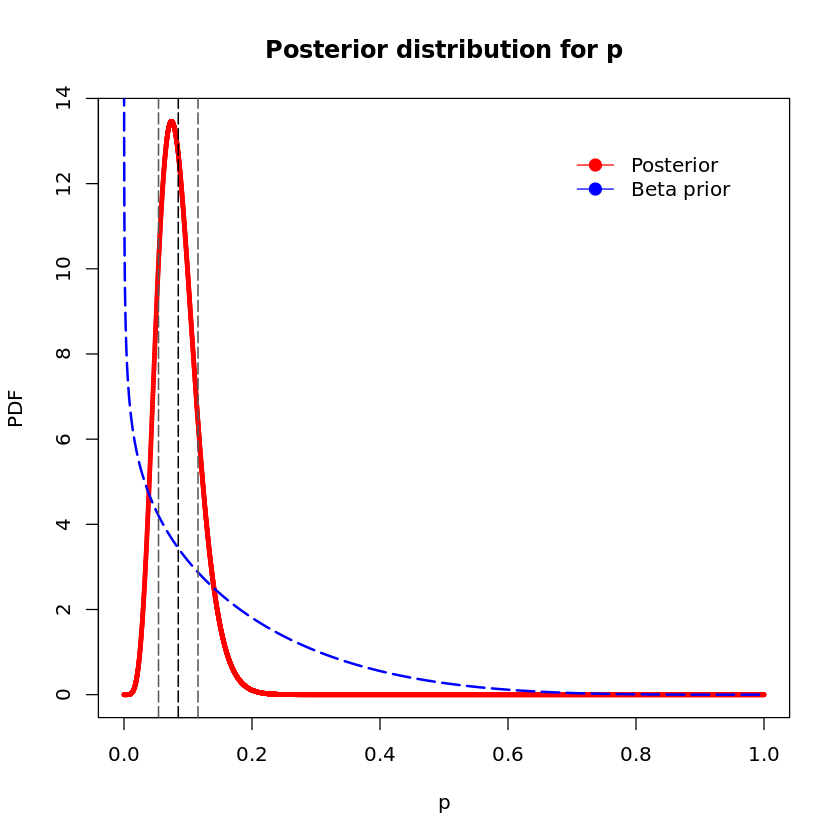

In [9]:
posterior <- dbeta(p,alfa+6,beta+75-6)
alfa_new <- alfa+6
beta_new <- beta+75-6

mean <- (alfa_new)/(alfa_new+beta_new)
var <- (alfa_new*beta_new)/(alfa_new+beta_new)**2/(alfa_new+beta_new+1)

plot(p,posterior,type='p',col='red',
    xlab = "p",
    ylab = "PDF", 
    cex = 0.4, 
    main = "Posterior distribution for p")
lines(x=p,y=prior,type='l',lty=5,col='blue', xlab = "", ylab = "",cex = 0.75,lwd=2)
legend(x=0.7,y=13,
       legend = c("Posterior", "Beta prior"),
       col = c("red", "blue"),
       pch = c(20,20),
       lty = c(1,1),
       pt.cex = c(2,2),
       bty = "n")
abline(v = mean, col = "black", lty = 5, lwd = 1.25)
abline(v = mean+var**0.5, col = "gray35", lty = 5, lwd = 1.25)
abline(v = mean-var**0.5, col = "gray35", lty = 5, lwd = 1.25)
cat('p =',mean,'+-',var**0.5)

d) Perform a hypothesis test assuming that if the probability of failing to the detect the desease in ill
patients is greater or equal than 15%, the new test is no better that the traditional method. Test the
sample at a $\alpha=5$% level of significance in the Bayesian setting.
 

$H_0$: Failure probability $p\ge p_0=0.15$ (new test is not better than the old). 

Given the posterior $g(p|y=6)=Beta(\alpha',\beta')$, we evaluate:

$$P(p\ge p_0|y=6)= \int_{p_0}^{∞}g(p|y=6)dp$$ 

In [39]:
integral <- pbeta(0.15,alfa+6,beta+75-6,lower.tail = FALSE) 
integral

[1] 0.03127933

Since $P(p\ge p_0|y=6) < \alpha$, we can reject the null hypothesis and claim the new test is better at 5% significance.   

e) Perform the same hypothesis test in the classical frequentist setting

P(y=6|H0) =  0.03093326

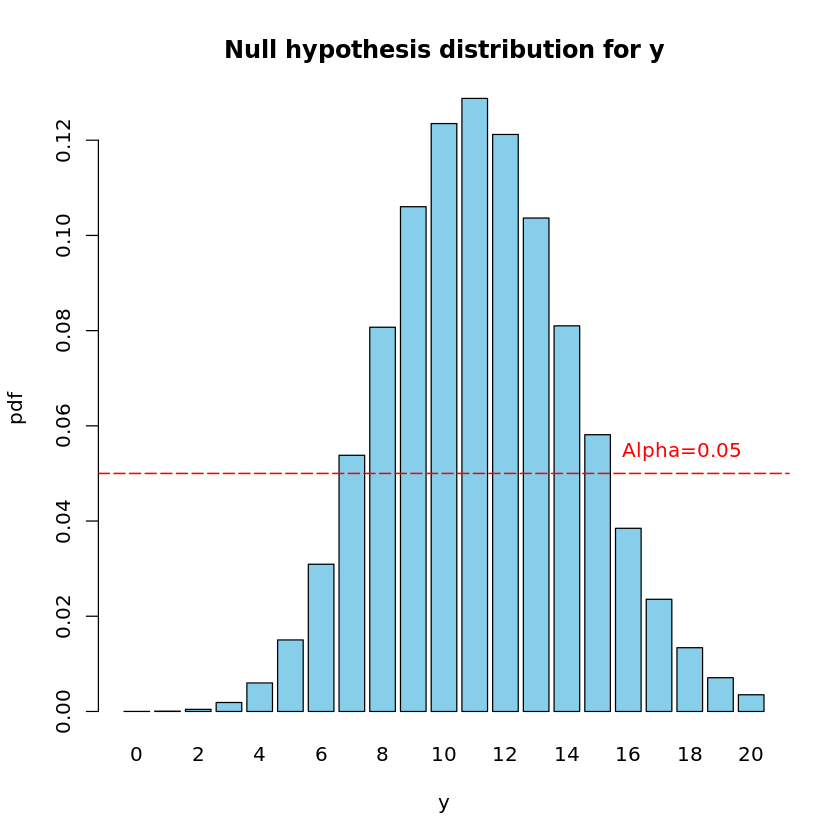

In [30]:
y <- seq(0,20,by=1)
likel <- dbinom(y,75,0.15)
h_0 <- dbinom(6,75,0.15)

barplot(likel,names.arg=y,
        main = "Null hypothesis distribution for y",
        xlab = "y",
        ylab = "pdf",col='skyblue') 
abline(h=0.05, col = "red", lty = 5, lwd = 1.25)
text(x = 22, y = 0.051, labels = "Alpha=0.05", pos = 3, col = "red")
cat("P(y=6|H0) = ",h_0)

Since $P(y=6|H_0) < \alpha=0.05$, we can reject the null hypothesis and claim the new method is better than the old one at 5% significance. 

## Exercise 2

A researcher has collected the following n = 20 observations that are supposed to be drawn from
an unimodal Beta distribution $Beta(\alpha = 2, \beta)$, where $\alpha = 2$ is fixed and $\beta$ is the unknown parameter: \
0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 0.723, 0.493, 0.504, 0.428,
0.27, 0.53, 0.057, 0.585, 0.288, 0.171

Let the prior be the following piece-wise function:

$$
p(\beta) =
\begin{cases}
0.2\beta & \text{for } 0.1 \leq \beta < 2 \\
\frac{1}{0.8\sqrt{2\pi}} \exp \left( -\frac{(\beta - 2.8)^2}{2(0.8)^2} \right) & \text{for } 2 \leq \beta < 4 \\
0.1 & \text{for } 4 \leq \beta \leq 10 \\
0 & \text{otherwise}
\end{cases}
$$


a) Find the posterior distribution, the posterior mean and standard deviation.

We calculate numerically the likelihood of the observed data given for a $Beta(2,\beta)$ model. 

In [1]:
obs <- c(0.269, 0.344, 0.802, 0.418, 0.433, 0.835, 0.52, 0.139, 0.243, 0.294, 0.723, 0.493, 0.504, 0.428, 0.27, 0.53, 0.057, 0.585, 0.288, 0.171)
    
b <- seq(0,15, by=0.0001) # possible betas

likelihood <- function(beta,obs){ 
    likel <- prod( dbeta(obs,2,beta) ) # returns the likelihood of a vector of observed data, given beta
    return(likel) } 

vec_likelihood <- function(betas,obs){              
return( sapply(betas,likelihood,obs=obs) ) } # returns a vector of likelihood given observed data,
                                             # one value for each choice of beta 
                                             # sapply applies the function likelihood to each element of vector betas

prior <- function(beta){  
if( beta >= 0.1 & beta <2 )return (0.2*beta)
else if( beta >= 2 & beta <4 ) return ( 1/(0.8*(2*pi)**0.5) * exp(- (beta-2.8)**2/(2*0.8**2))  ) 
else if( beta >= 4 & beta <10 ) return (0.1)
else return(0)}

vec_prior <- function(betas){ 
    
return(sapply(betas,prior) ) }
    
priors <- vec_prior(b)
likelihoods <- vec_likelihood(b, obs)

posterior <- priors*likelihoods/sum(priors*likelihoods*0.0001)

mean_post <- sum(b*posterior*0.0001)
var_post <- sum(b**2*posterior*0.0001) - mean_post**2

cat("The mean value of the posterior distribution for Beta is: ", mean_post, "+-",var_post**0.5 )

The mean value of the posterior distribution for Beta is:  2.809011 +- 0.4338389

b) find the 95% credibility interval for β

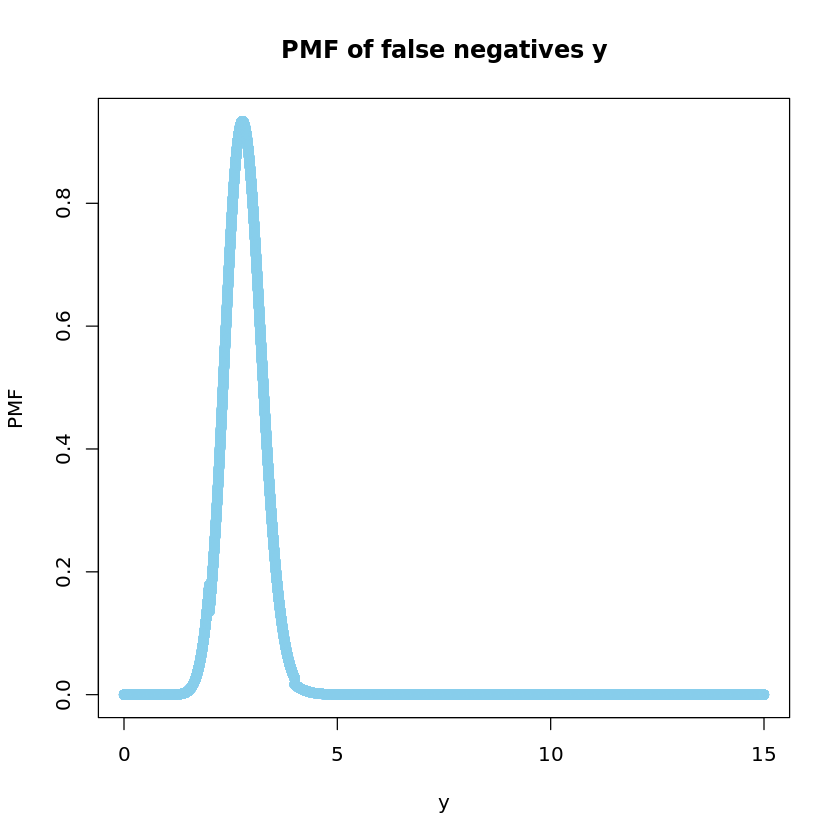

In [71]:
ticks= seq(1,20,by=1)
plot(b,posterior,type='p',col='red',
    xlab = "p",
    ylab = "PDF", 
    cex = 0.4, 
    main = "Posterior distribution for p")
